In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

## Modelos de cópia de vértices

Uma pessoa A começa uma relação com outra pessoa B. 
Depois de algum tempo, A “adota” muitos dos amigos da B: A copia os amigos de B. 

Um novo artigo cita alguns dos artigos do certo tópico já citados, por exemplo, em um artigo de revisão da literatura, i.e., copia citações de outro artigo. 

Estes exemplos conduzem à ideia dos modelos de cópia de vértices.

Suponha que cada novo vértice numa rede estabelece $\lambda$ novas ligações (arestas de saída) da seguinte maneira:
1. Escolhe um vértice ao acaso entre os nós já existentes na rede.
2. Cada uma das $\lambda$ ligações são formadas assim:
    - Para cada um dos $\lambda$ sucessores do vértice escolhido no passo anterior, com probabilidade $q$, adiciona uma aresta do novo nó para este sucessor, ou com probabilidade $(1-q)$, liga-se a um vértice tomado ao acaso na rede.

O **networkx** tem duas funções para gerar redes baseadas em modelos de cópia:
- **duplication_divergence_graph()**
- **partial_duplication_graph()**. 

**duplication_divergence_graph(n, p, seed=None)**: returns an undirected graph using the duplication-divergence model.

A graph of $n$ nodes is created by duplicating the initial nodes and retaining edges incident to the original nodes with a retention probability $p$.

Parameters:
- n (int): the desired number of nodes in the graph.
- p (float): the probability for retaining the edge of the replicated node.
- seed (integer, random_state, or None (default)): indicator of random number generation state.

In [73]:
n = 100
G = nx.duplication_divergence_graph(n, 0.2, seed=None)

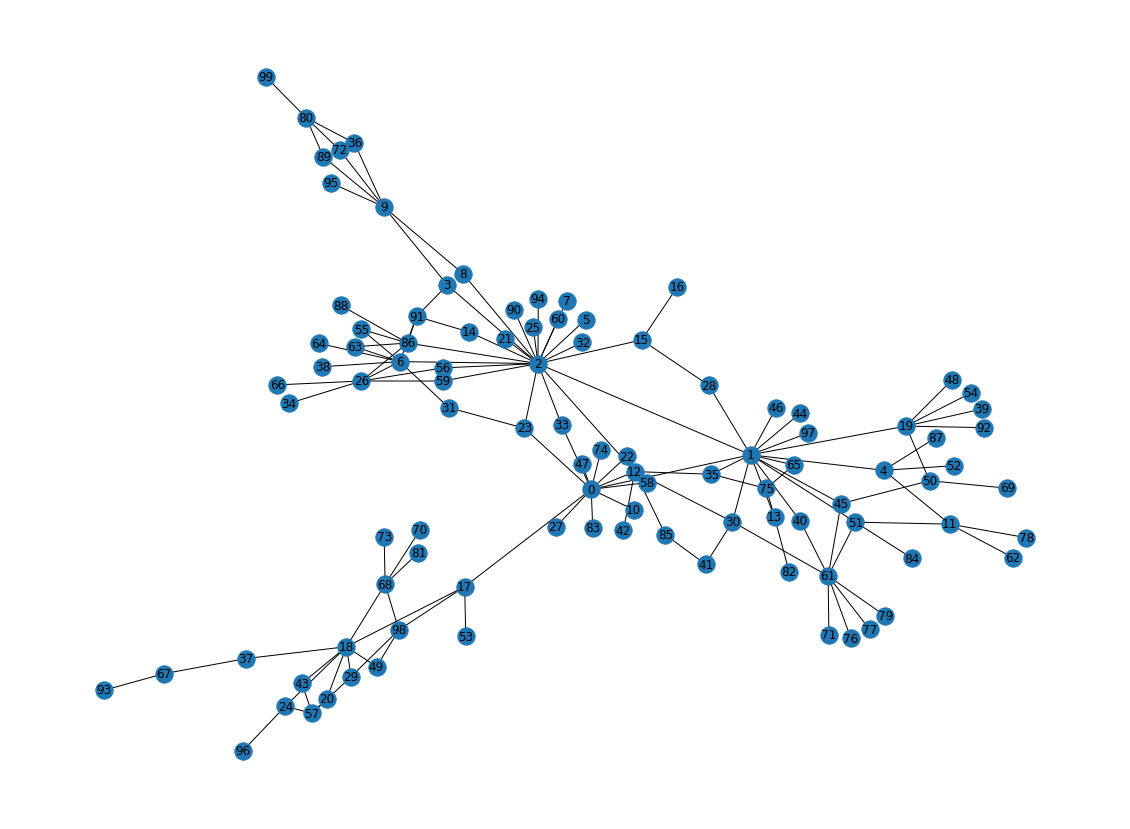

In [74]:
fig, ax = plt.subplots(1,1,figsize=(20,15))

nx.draw(G, with_labels=True)

In [75]:
dia = nx.diameter(G)
print(dia)

12


In [76]:
agru = nx.transitivity(G)
print(agru)

0


**partial_duplication_graph(N, n, p, q, seed=None)**: returns a random graph using the partial duplication model.

Parameters:
- N (int): the total number of nodes in the final graph.
- n (int): the number of nodes in the initial clique.
- p (float): the probability of joining each neighbor of a node to the duplicate node. 
Must be a number in the between zero and one, inclusive.
- q (float): The probability of joining the source node to the duplicate node. 
Must be a number in the between zero and one, inclusive.
- seed (integer, random_state, or None (default)): indicator of random number generation state.

Notes:

A graph of nodes is grown by creating a fully connected graph of size $n$. 
The following procedure is then repeated until a total of $N$ nodes have been reached.

A random node, $u$, is picked and a new node, $v$, is created.

For each neighbor of $u$ an edge from the neighbor to $v$ is created with probability $p$.

An edge from $u$ to $v$ is created with probability $q$.

In [77]:
G = nx.partial_duplication_graph(100, 20, 0.5, 0.2, seed=None)

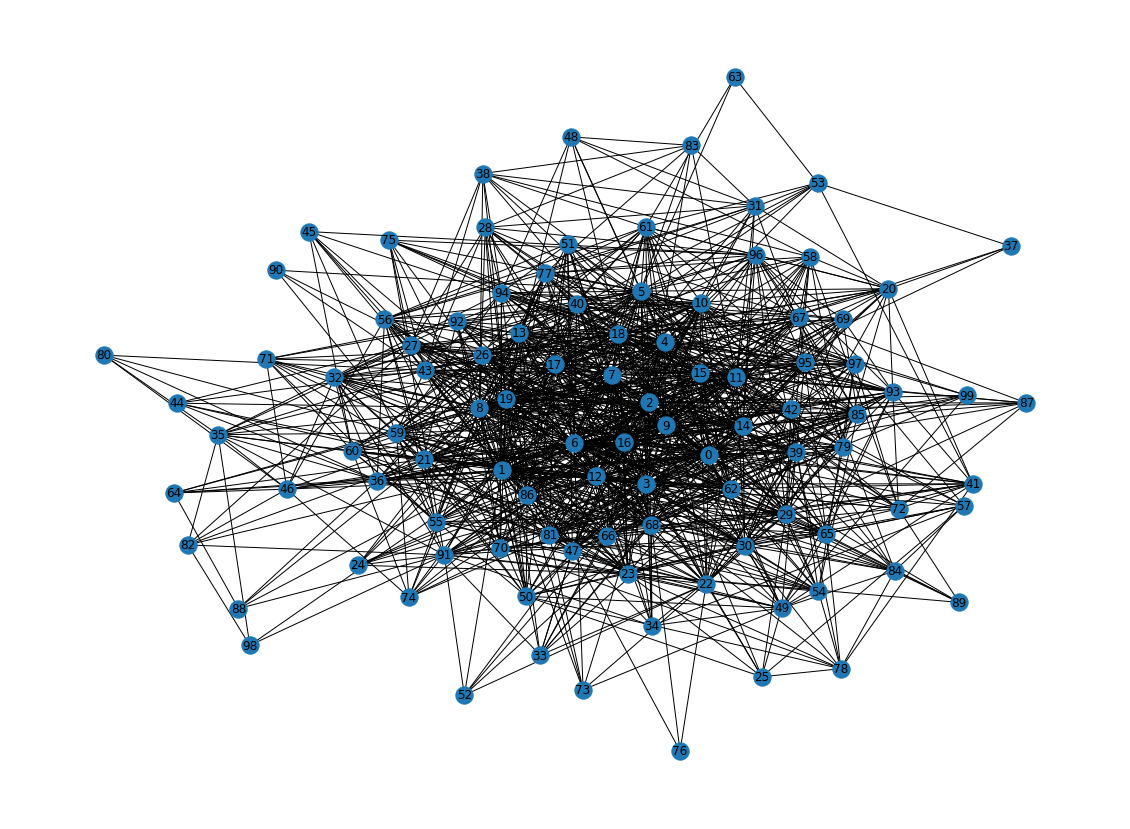

In [78]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
nx.draw_kamada_kawai(G, with_labels=True)

In [79]:
agru = nx.transitivity(G)
print(agru)

0.42651863336840357


### Exemplo

O seguinte código apresenta uma implementação deste modelo de cópia. 

Inicialmente, forma-se um grafo com $k$+1 nós, onde cada nó está ligado com todos os outros nós (sem laços). 

Para cada novo vértice, o algoritmo procede como já foi explicado, mas evitando repetir ligações. 

Considere uma rede com $n$ nós, $q=0.7$ e grau de saída $k=4$ em cada vértice.

In [80]:
rng = default_rng()

In [81]:
G1 = nx.DiGraph ()

n = 100
q = 0.7
G1.add_nodes_from(np.arange(0,n))
grauin = np.zeros(n)
lamb = 4

In [82]:
for i in range(lamb+2):
    for j in range(lamb+2):
        if i == j:
           continue
        G1.add_edge(i,j)

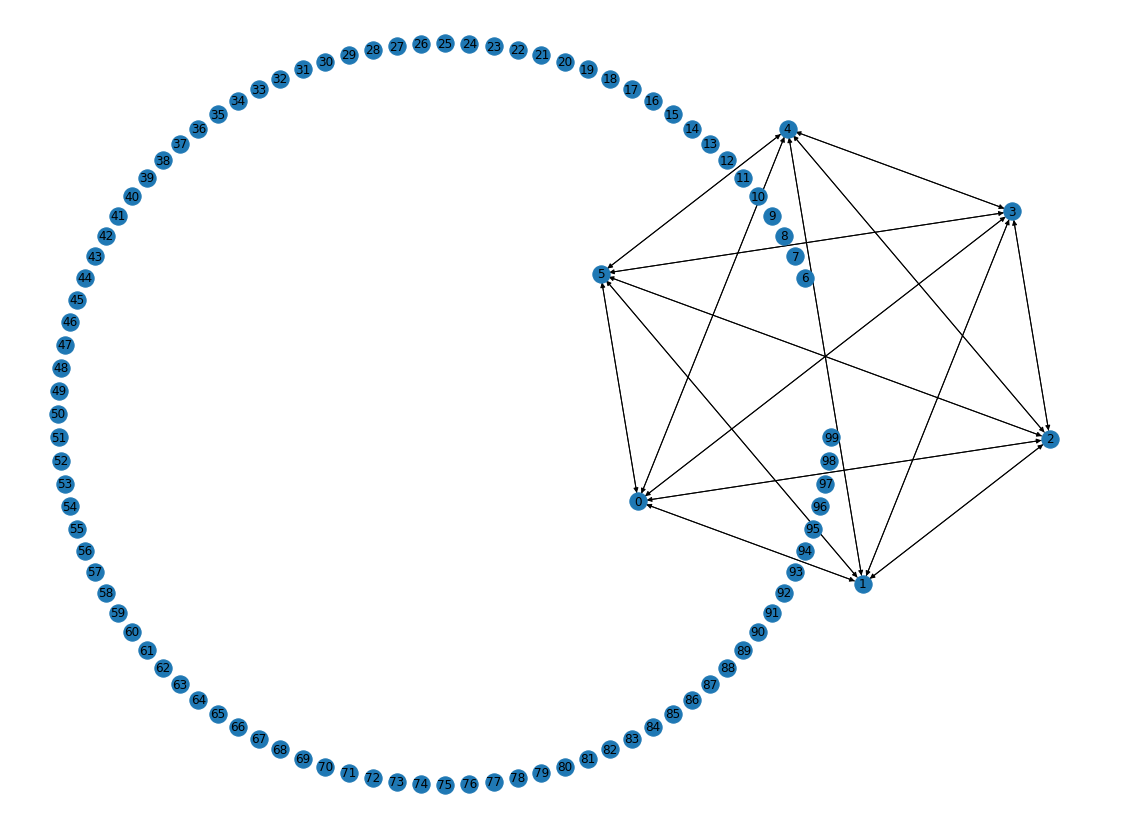

In [83]:
fig, ax = plt.subplots(1,1,figsize=(20,15))

nx.draw_kamada_kawai(G1, with_labels=True)

In [84]:
for i in range (lamb+3,n):
    j = rng.choice(i)
    jj = set()
    jj.add(i)
    for k in G1.successors(j):
        if rng.random() < q:
            jj.add(k)
            G1.add_edge(i,k)
        else:
            k = i
            while k in jj:
               k = rng.choice(i)
            G1.add_edge(i,k)
            jj.add(k)

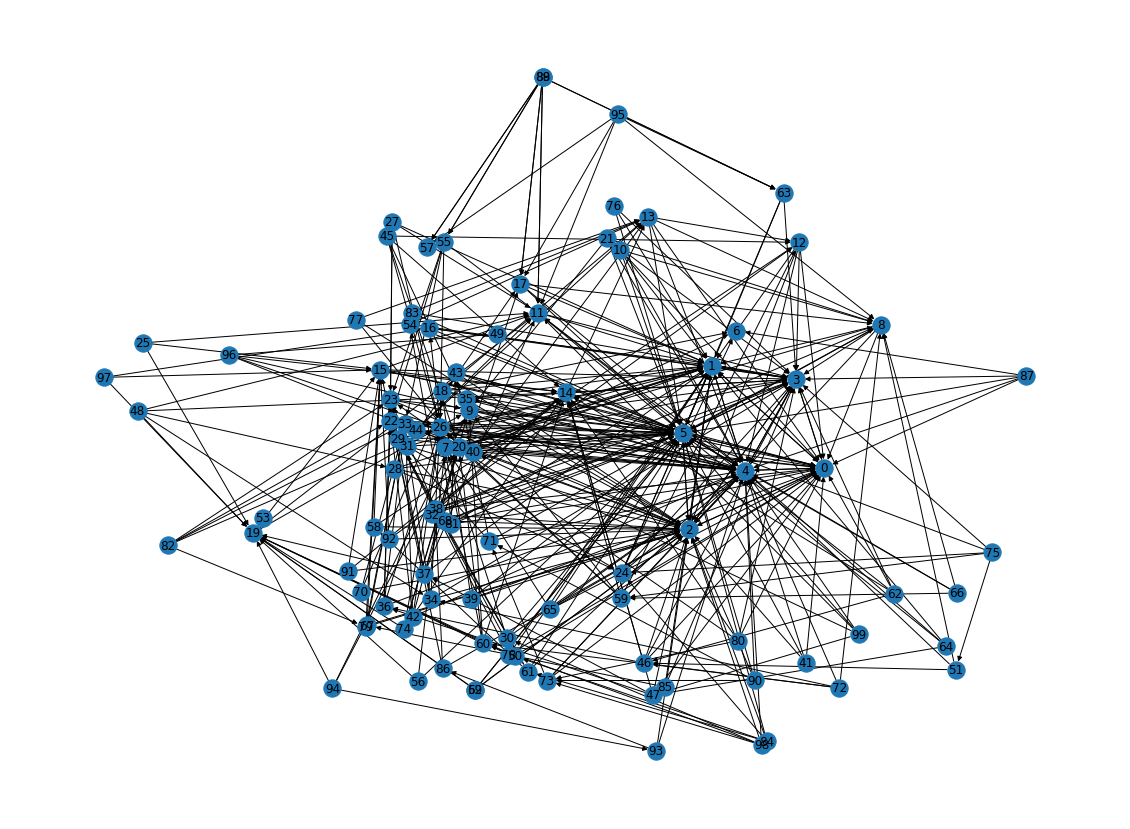

In [85]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
 
nx.draw_kamada_kawai(G1, with_labels=True)